In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

uni = pd.read_csv("Predict Student Dropout and Academic Success.csv", delimiter=";")

In [2]:
print(uni.columns)


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [3]:
print(uni.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [4]:
uni["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Drop target column for features
X = uni.drop(columns=['Target'])
y = uni['Target']

# Encode categorical variables
X_encoded = pd.get_dummies(X)

model = RandomForestClassifier()
model.fit(X_encoded, y)

# Feature importance
importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
print(importances.sort_values(ascending=False))


Curricular units 2nd sem (approved)               0.150329
Curricular units 2nd sem (grade)                  0.106078
Curricular units 1st sem (approved)               0.080155
Curricular units 1st sem (grade)                  0.062638
Admission grade                                   0.042832
Curricular units 2nd sem (evaluations)            0.041483
Tuition fees up to date                           0.040705
Age at enrollment                                 0.039596
Previous qualification (grade)                    0.037062
Curricular units 1st sem (evaluations)            0.036760
Course                                            0.033537
Father's occupation                               0.029252
Mother's occupation                               0.025283
GDP                                               0.023030
Father's qualification                            0.021760
Unemployment rate                                 0.021758
Inflation rate                                    0.0214

Lowest Important Features: Nacionality, International, Educational Special Needs

Medium: GDP, Unemployment rate, Inflation rate

High: Curricular Units, Admission Grade 

In [6]:
uni['Pass Rate 1st Sem'] = uni['Curricular units 1st sem (approved)'] / uni['Curricular units 1st sem (enrolled)']
uni['Pass Rate 2nd Sem'] = uni['Curricular units 2nd sem (approved)'] / uni['Curricular units 2nd sem (enrolled)']

uni['Pass Rate 1st Sem'] = uni['Pass Rate 1st Sem'].fillna(0)
uni['Pass Rate 2nd Sem'] = uni['Pass Rate 2nd Sem'].fillna(0)


In [7]:
X = uni[['Pass Rate 1st Sem', 'Pass Rate 2nd Sem', 'Admission grade']]
y = uni['Target']

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check label encoding
print(label_encoder.classes_)  # To see the mapping



['Dropout' 'Enrolled' 'Graduate']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       441
           1       0.35      0.30      0.32       245
           2       0.78      0.81      0.79       642

    accuracy                           0.67      1328
   macro avg       0.60      0.60      0.60      1328
weighted avg       0.66      0.67      0.67      1328



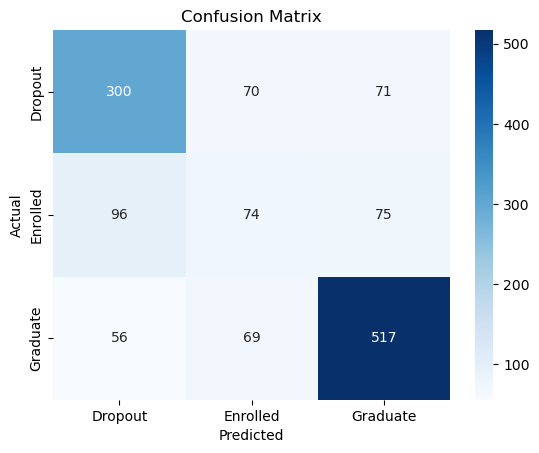

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
